In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('non_linear.csv')

In [3]:
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


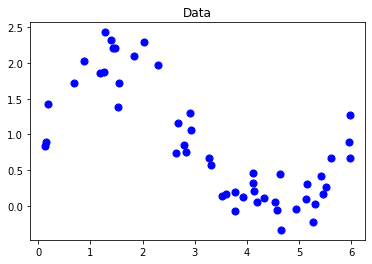

In [4]:
plt.title('Data')
plt.scatter(df.x_train, df.y_train,50, 'b', 'o')
plt.show();

# Linear Regression

Analytical formula for finding the regression coefficients looks like

$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

We get the model predictions using the regression coefficients in the form

$$
\hat{y} = w_0x_0 + \ldots w_nx_n
$$

In [5]:
class SimpleLinearRegression:
    
    def __init__(self):
        self.w = None
                
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return 'fitted'
    
    def predict(self,X):
        return X.dot(self.w)

In [6]:
def split_train_test(data, train_size=0.8):
    X = data.iloc[:,0].values
    # add constant feature
    X = np.c_[X, np.ones(len(X))]
    y = data.iloc[:,1].values
    
    indx = [i for i in range(data.shape[0])]
    train_instances = int(train_size * data.shape[0])
    np.random.shuffle(indx)
    train_indx = indx[:train_instances]
    test_indx = indx[train_instances:]
    
    X_train, y_train = X[(train_indx)], y[(train_indx)]
    X_test, y_test = X[(test_indx)], y[(test_indx)]
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split_train_test(df)

In [8]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean squared error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

In [9]:
def MSE(y_true, y_pred):
    return np.average((y_true - y_pred)**2)

In [10]:
MSE(y_test, y_pred)

0.4065411398717974

In [11]:
model.w

array([-0.36594446,  2.02897493])

$$
\|w\|^2 = w_1^2+\ldots+w_n^2
$$
To calculate this metric, we use function *norm* from *numpy*

In [12]:
np.linalg.norm(model.w)

2.0617115783090934

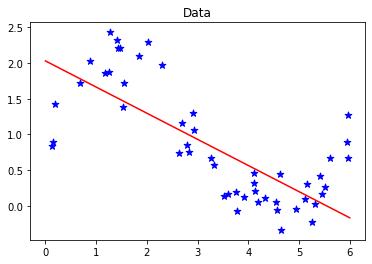

In [13]:
# draw a graph
xx = np.linspace(0,6, num=50)
yy = model.w[0]*xx+ model.w[1]

plt.title('Data')
plt.plot(xx, yy,'r')
plt.scatter(df.x_train, df.y_train,50, 'b', '*')
plt.show();

As we can see this model doesn't describe our data very well.

Let's train a polynomial regression for different degrees of the polynomial: very large, very small, and medium

In the case of training regression on a single feature, the module will take the form $y = w_0 + w_1x +w_2x^2 + \ldots + w_nx^n$

In [14]:
# A function that takes a one-dimensional array as input and returns an n-dimensional array
# For each degree from 1 to degree, we raise x to this degree
def generate_degrees(data, degree):
    return np.array([data**n for n in range(1, degree+1)]).T

In [15]:
def train_polynomial(data:np.array, degree:int):
    
    # Generating data
    X = generate_degrees(data.iloc[:,0].values, degree)
    y = data.iloc[:,1].values
    # Split arrays into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    #Training our model
                                                        
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    error_test = mean_squared_error(y_test, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    
    print(f'Polinom degree = {degree}\nMSE_test = {error_test}\nMSE_train = {error_train}\n||w|| ={np.linalg.norm(model.coef_)}')
    
    # draw a graph
    plt.scatter(X_test[:,0], y_test, 40, 'r', 'o', label='test')
    plt.scatter(X_train[:,0], y_train, 40, 'b',  '*', label='train')
    x_linspace = np.linspace(data.iloc[:,0].min(), data.iloc[:,0].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace,'g', label='model')
    plt.legend(loc='upper right')
    plt.show();
    return error_test, error_train, np.linalg.norm(model.coef_)

degrees = []
test_errors = []
train_errors = []
w_norm = []

Polinom degree = 2
MSE_test = 0.24497135044487545
MSE_train = 0.31375697267592034
||w|| =0.46569133707581395


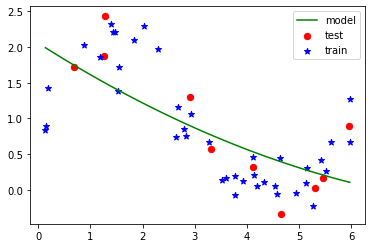

In [16]:
degree = 2

error_test, error_train, coef_norm = train_polynomial(df, degree)

degrees.append(degree)
test_errors.append(error_test)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinom degree = 3
MSE_test = 0.050634419192062505
MSE_train = 0.07744269978781704
||w|| =2.1866817316351312


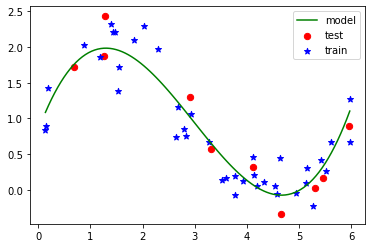

In [17]:
degree = 3

error_test, error_train, coef_norm = train_polynomial(df, degree)

degrees.append(degree)
test_errors.append(error_test)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinom degree = 5
MSE_test = 0.0627190869791066
MSE_train = 0.06938399857231471
||w|| =3.3093942900803737


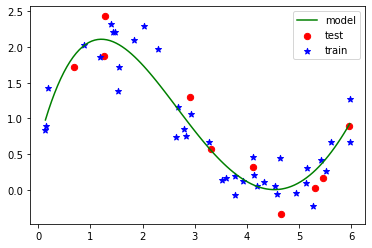

In [18]:
degree = 5

error_test, error_train, coef_norm = train_polynomial(df, degree)

degrees.append(degree)
test_errors.append(error_test)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinom degree = 10
MSE_test = 0.12191892709947731
MSE_train = 0.051885490503240594
||w|| =120.14004844540838


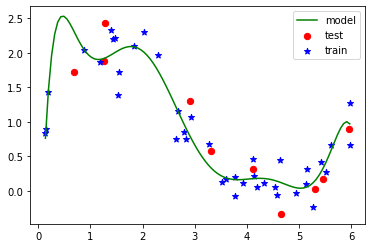

In [19]:
degree = 10

error_test, error_train, coef_norm = train_polynomial(df, degree)

degrees.append(degree)
test_errors.append(error_test)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinom degree = 12
MSE_test = 0.12518617851059644
MSE_train = 0.05112660391711561
||w|| =225.50833959023254


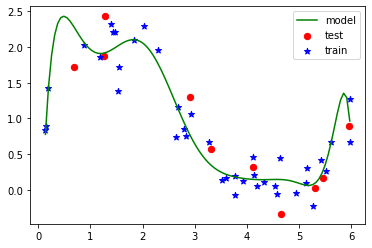

In [20]:
degree = 12

error_test, error_train, coef_norm = train_polynomial(df, degree)

degrees.append(degree)
test_errors.append(error_test)
train_errors.append(error_train)
w_norm.append(coef_norm)

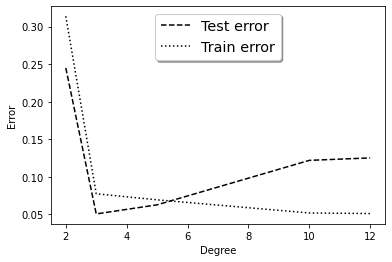

In [21]:
fig, ax = plt.subplots()
ax.plot(degrees, test_errors, 'k--', label='Test error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

As we can see on the graph with increasing degree  the error in test begins to grow, and in training, on the contrary, it falls. At the same time the norm of the coefficient vector increases $w$ -  from $0.47$ to $225.5$. It means that our model is overfitted. Point where $degree = 5$ and where two error lines intersect is good enough for our model.
The higher $\|w\|^2$ the strongere is overfitting. Therefore, by making the coefficients smaller, we will reduce overfitting. It's time to regularization!

Analytical formula for finding new regression coefficients with regularization looks like
$$
\overline{w} = \left(X^TX + \alpha E\right)^{-1}X^TY
$$

Where $\alpha$ is regularization parameter. It takes values from 0 to 1 : the closer to 1-the stronger the regularization, the more the linear regression weights decrease.

$E$ unit matrix of dimension 𝑘×𝑘 (by the number of linear regression coefficients)

$$
E = 
\left[
\begin{array}{ccccc}
1 & 0 & \ldots & 0 & 0 \\
0 & 1 & \ldots & 0 & 0 \\
\ldots& \ldots& \ldots& \ldots& \ldots \\
0 & 0 & \ldots & 1 & 0 \\
0 & 0 & \ldots & 0 & 1 \\
\end{array}
\right]
$$

In [22]:
class LinearRegressionL2:
    
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.w = None
                
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)+ self.alpha*np.eye(X.shape[1])).dot(X.T).dot(y)
        return 'fitted'
    
    def predict(self,X):
        return X.dot(self.w)

In [23]:
X = generate_degrees(df.iloc[:,0].values, 5)
y = df.iloc[:,1].values

In [24]:
model = LinearRegressionL2(alpha=0.9)
model.fit(X,y)
model.w

array([ 1.73695613,  0.3048667 , -0.59245536,  0.14044158, -0.0095897 ])

In [25]:
model = Ridge(alpha=0.9, fit_intercept=False)
model.fit(X,y)
model.coef_

array([ 1.73695613,  0.3048667 , -0.59245536,  0.14044158, -0.0095897 ])

In [26]:
def polynom_regularization(data:np.array, degree:int, alpha:float):
    X = generate_degrees(df.iloc[:,0].values, degree)
    y = df.iloc[:,1].values
    
    model=Ridge(alpha=alpha)
    model.fit(X, y)
              
    print(f'||w||={np.linalg.norm(model.coef_)} alpha = {alpha}')
    plt.scatter(X[:,0], y, 40, 'b',  '*')
    x_linspace = np.linspace(data.iloc[:,0].min(), data.iloc[:,0].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace, label=f'alpha = {alpha}')
    plt.legend(loc='upper right')

||w||=0.8028328196731191 alpha = 1
||w||=0.9503298028556212 alpha = 0.5
||w||=3.139392806692482 alpha = 0.001


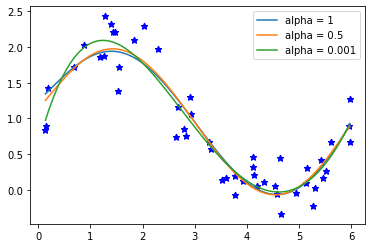

In [27]:
polynom_regularization(df, 5, 1)
polynom_regularization(df, 5, 0.5)
polynom_regularization(df, 5, 0.001)